# Variables Explanation

In [1]:
import os
import sys

from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
import util_wsa_uncertainty

sns.set()

In [2]:
os.chdir("..")

In [3]:
df_dataset = pd.read_csv(
    "data/WSA_DATA/UNCERTAINTY/KNN_DATASET/AGONG/R000/AGONG_ACE_daysahead1_R000_knn_dataset.csv",
    index_col=0,
)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset = df_dataset.interpolate()
df_dataset.head()

,Vp_pred,Vp_obs
2010-01-02 00:00:00,340.900000,307.57
2010-01-02 06:00:00,376.385714,301.28
2010-01-02 12:00:00,351.312500,279.86
2010-01-02 18:00:00,401.900000,275.88
2010-01-03 00:00:00,399.200000,273.56


In [4]:
knn_dataset = util_wsa_uncertainty.KnnUncertaintyDataset(
    input_map="AGONG", sat="ACE", real=0, daysahead=3, delta_window=2
)

In [5]:
# ts = pd.Timestamp('2010-05-17 00:00:00')
# ts = pd.Timestamp('2014-01-01T00:00:00')
# ts = pd.Timestamp('2014-07-15T00:00:00')
# ts = pd.Timestamp('2014-12-15T00:00:00')
# ts = pd.Timestamp('2015-02-15T00:00:00')
# ts = pd.Timestamp('2015-06-15T00:00:00')
ts = pd.Timestamp("2015-07-15T06:00:00")

idx = df_dataset.index.searchsorted(ts)
idx

8081

In [6]:
NPRED = knn_dataset.npred
NOBS = knn_dataset.nobs

In [7]:
times = df_dataset.iloc[idx : idx + NPRED].index
Vp_obs = df_dataset.Vp_obs.iloc[idx : idx + NOBS]
Vp_pred = df_dataset.Vp_pred.iloc[idx : idx + NPRED]

In [10]:
def draw_range(ax, x_start, x_end, y, range_label):

    # Draw left-to-right arrow
    ax.annotate(
        "",
        xy=(x_end, y),
        xytext=(x_start, y),
        arrowprops=dict(arrowstyle="<->", color="black", lw=1.5),
    )

    # Add centered text label
    ax.text(
        x_start + (x_end - x_start) / 2,
        y + 20,
        range_label,
        ha="center",
        va="bottom",
        fontsize=12,
    )

Axes(0.125,0.11;0.775x0.77)


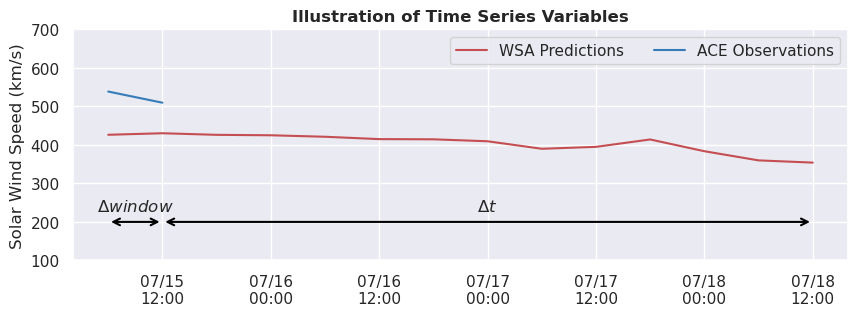

In [11]:
blue_color = "#367cb9"
red_color = "r"
black_color = "k"
pred_label = "WSA Predictions"
obs_label = "ACE Observations"
speed_ylabel = "Solar Wind Speed (km/s)"
datetime_form = mdates.DateFormatter("%m/%d\n%H:00")

fig, axes = plt.subplots(1, 1, figsize=(10, 3))
print(axes)

ax = axes
ax.plot(times, Vp_pred, color=red_color, label=pred_label)
ax.plot(times[:NOBS], Vp_obs, color=blue_color, label=obs_label)
ax.set_ylabel(speed_ylabel)
ax.set_title("Illustration of Time Series Variables", fontweight="bold")
ax.legend(loc="upper right", ncol=2)
ax.set_ylim(100, 700)

draw_range(ax, times[0], times[NOBS - 1], 200, r"$\Delta window$")

draw_range(ax, times[NOBS - 1], times[NPRED - 1], 200, r"$\Delta t$")
ax.xaxis.set_major_formatter(datetime_form)

fig.savefig("plots/variables.png", dpi=300, bbox_inches="tight")
# draw_range(ax, times[NOBS - 1], times[NPRED - 6], 130, r'$\Delta forward$')